<a href="https://colab.research.google.com/github/yashaswinicse/CodSoft-Internship/blob/main/Movie_Genre_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Movie Genre Classification

# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")


In [2]:
# reading the dataset
train = pd.read_csv('train_data.txt', sep = ':::', names = ['index','title','genre','description'])
test = pd.read_csv('test_data_solution.txt', sep = ':::', names = ['index','title','genre','description'])



In [3]:
# few rows
test.head()

,index,title,genre,description
0,1,Edgar's Lunch (1998),thriller,"L.R. Brane loves his life - his car, his apar..."
1,2,La guerra de papá (1977),comedy,"Spain, March 1964: Quico is a very naughty ch..."
2,3,Off the Beaten Track (2010),documentary,One year in the life of Albin and his family ...
3,4,Meu Amigo Hindu (2015),drama,"His father has died, he hasn't spoken with hi..."
4,5,Er nu zhai (1955),drama,Before he was known internationally as a mart...


In [4]:
train.head()

,index,title,genre,description
0,1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...
1,2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
2,3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
3,4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
4,5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...


In [5]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54200 entries, 0 to 54199
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   index        54200 non-null  int64 
 1   title        54200 non-null  object
 2   genre        54200 non-null  object
 3   description  54200 non-null  object
dtypes: int64(1), object(3)
memory usage: 1.7+ MB


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54214 entries, 0 to 54213
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   index        54214 non-null  int64 
 1   title        54214 non-null  object
 2   genre        54214 non-null  object
 3   description  54214 non-null  object
dtypes: int64(1), object(3)
memory usage: 1.7+ MB


In [7]:
print('test:' ,test.shape)
print('train:',train.shape)

test: (54200, 4)
train: (54214, 4)


In [8]:
# checking the null values
test.isnull().sum()
train.isnull().sum()

index          0
title          0
genre          0
description    0
dtype: int64

# Countplot on train data

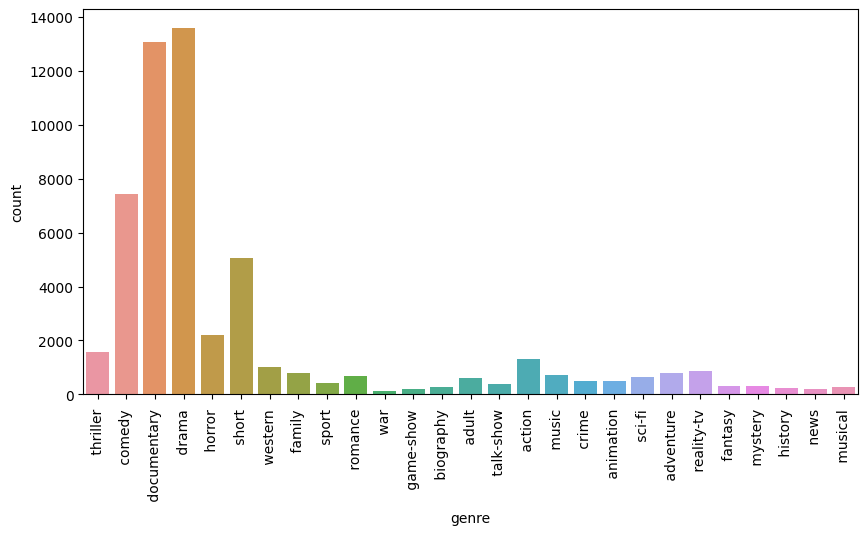

In [9]:
plt.figure(figsize = (10,5))
sns.countplot(x= test['genre'])
plt.xticks(rotation = 90)
plt.show()

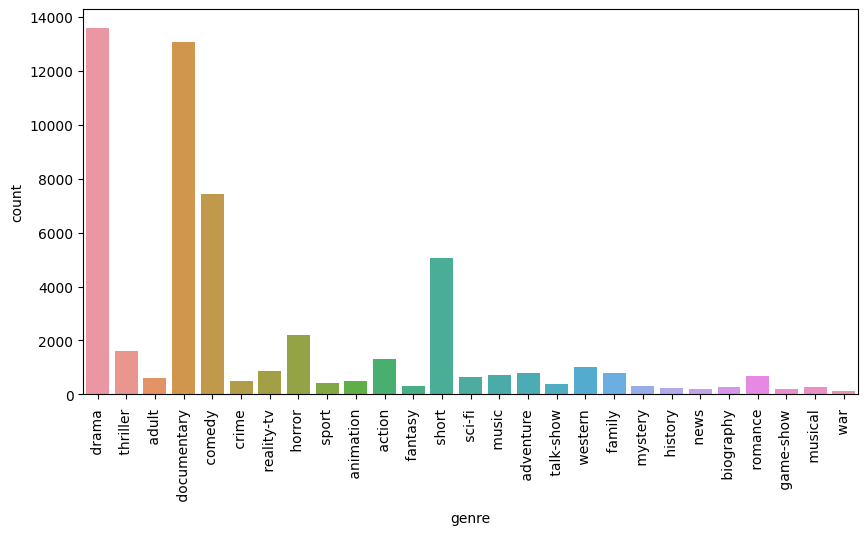

In [10]:
plt.figure(figsize = (10,5))
sns.countplot(x= train['genre'])
plt.xticks(rotation = 90)
plt.show()

# Cleaning the data

In [11]:
# importing libraries
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [12]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [14]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [13]:
# converting text to lower case and removing special character
def clean(text):
  text = text.lower()
  text = re.sub(r'(@\[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|^rt|http.+?','',text)
  words = text.split()
  text = ' '.join([word for word in words if word not in stopwords.words('english')])
  words = text.split()
  text = ' '.join([ps.stem(word) for word in words])
  return text.strip()

In [15]:
# description
clean(test['description'][1])


'spain march 1964 quico naughti child three belong wealthi middleclass famili sinc cristina birth feel lost privileg posit princ hous eight month old sister brother juan eight year old quit disobedi spend time commit prank prank caus result anger mother nanni old housemaid rest famili member two much older brother resign mother retrograd father authoritarian idea mani year pass civil war despot pablo simpli children dad war'

In [16]:
test['Description'] = test['description'].apply(lambda x : clean(x))

In [17]:
train['Description'] = train['description'].apply(lambda x : clean(x))

In [19]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
text_transform = TfidfVectorizer(stop_words = 'english', ngram_range = (1, 2), max_features = 200000)

In [20]:
x_traintext = text_transform.fit_transform(train['Description'])
x_testtext = text_transform.transform(test['Description'])

In [22]:
y = train['genre']
y_test = test['genre']


# Logistic Regression

In [25]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(multi_class = 'ovr')
lr.fit(x_traintext, y)

LogisticRegression(multi_class='ovr')

In [ ]:
pip install scikit-plot

In [29]:
from sklearn.metrics import accuracy_score ,classification_report
import scikitplot as skplt

In [42]:
y_predict = lr.predict(x_testtext)
logistic_accuracy = accuracy_score(y_test , y_predict)*100
logistic_accuracy

57.811808118081174

In [41]:
print("classification report is",classification_report(y_test , y_predict))

classification report is                precision    recall  f1-score   support

      action        0.54      0.21      0.30      1314
       adult        0.63      0.18      0.29       590
   adventure        0.77      0.13      0.22       775
   animation        0.33      0.01      0.02       498
   biography        0.00      0.00      0.00       264
      comedy        0.54      0.56      0.55      7446
       crime        0.50      0.02      0.03       505
 documentary        0.64      0.88      0.74     13096
       drama        0.52      0.81      0.63     13612
      family        0.66      0.05      0.09       783
     fantasy        0.50      0.01      0.01       322
   game-show        0.92      0.47      0.62       193
     history        0.00      0.00      0.00       243
      horror        0.67      0.55      0.60      2204
       music        0.70      0.34      0.46       731
     musical        0.00      0.00      0.00       276
     mystery        0.00      0.00     

# Naive bayes Classifier

In [40]:
# create a multinomial naive bayes
from sklearn.naive_bayes import MultinomialNB
multi_naive = MultinomialNB()
multi_naive.fit(x_traintext ,y)

MultinomialNB()

In [36]:
#prediction
y_pred = multi_naive.predict(x_testtext)
naive_accuracy= accuracy_score(y_test , y_pred)*100
naive_accuracy


44.47785977859778

In [37]:
models = pd.DataFrame  ({'Model':['LogisticRegression','naive_bayes (MultinomialNB)'],
                         'Score' : [logistic_accuracy,naive_accuracy]})

In [38]:
models

,Model,Score
0,LogisticRegression,57.811808
1,naive_bayes (MultinomialNB),44.477860


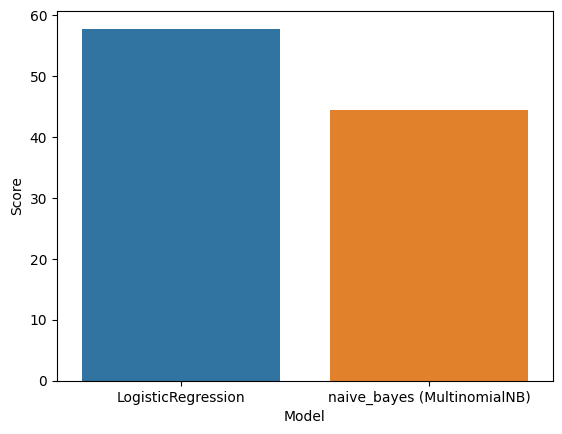

In [39]:
sns.barplot(x=models['Model'],y=models['Score'])
plt.xticks(rotation = 0)
plt.show()